In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('f28fb4fd-86cb-49e5-a222-6776bf371fdd.csv')

In [4]:
data.shape

(20, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   S. No                                            20 non-null     object
 1   City                                             20 non-null     object
 2    Juveniles Apprehended - Boys                    20 non-null     int64 
 3    Juveniles Apprehended - Girls                   20 non-null     int64 
 4    Juveniles Apprehended - Total                   20 non-null     int64 
 5   18 and above and below 30 years - Male           20 non-null     int64 
 6   18 and above and below 30 years - Female         20 non-null     int64 
 7   18 and above and below 30 years - Total          20 non-null     int64 
 8   30 and above and below 45 years - Male           20 non-null     int64 
 9   30 and above and below 45 years - Female     

In [6]:
data.head()

,S. No,City,Juveniles Apprehended - Boys,Juveniles Apprehended - Girls,Juveniles Apprehended - Total,18 and above and below 30 years - Male,18 and above and below 30 years - Female,18 and above and below 30 years - Total,30 and above and below 45 years - Male,30 and above and below 45 years - Female,30 and above and below 45 years - Total,45 and above and below 60 years - Male,45 and above and below 60 years - Female,45 and above and below 60 years - Total,60 years and above - Male,60 years and above - Female,60 years and above - Total,Total - Male,Total - Female,Total - Total Persons Arrested by age and Sex
0,1,Ahmedabad (Gujarat),298,0,298,14488,950,15438,12385,1290,13675,4264,668,4932,463,146,609,31898,3054,34952
1,2,Bengaluru(Karnataka),197,3,200,13577,579,14156,9602,974,10576,2531,381,2912,430,84,514,26337,2021,28358
2,3,Chennai(Tamil Nadu),816,0,816,13717,1117,14834,21194,2577,23771,16070,917,16987,2007,93,2100,53804,4704,58508
3,4,Coimbatore(Tamil Nadu),35,0,35,3248,488,3736,2674,293,2967,759,189,948,224,62,286,6940,1032,7972
4,5,Delhi,3073,2,3075,54129,1003,55132,30474,834,31308,8769,266,9035,514,22,536,96959,2127,99086


### This dataSet covers the following Cities

In [7]:
for city in data['City'].unique():
  print(city)

Ahmedabad (Gujarat)
Bengaluru(Karnataka)
Chennai(Tamil Nadu)
Coimbatore(Tamil Nadu)
Delhi
Ghaziabad(Uttar Pradesh)
Hyderabad(Telangana)
Indore(Madhya Pradesh)
Jaipur(Rajasthan)
Kanpur(Uttar Pradesh)
Kochi(Kerala)
Kolkata(West Bengal)
Kozhikode(Kerala)
Lucknow(Uttar Pradesh)
Mumbai(Maharashtra)
Nagpur(Maharashtra)
Patna(Bihar)
Pune(Maharashtra)
Surat(Gujarat)
TOTAL CITIES


In [ ]:
data.rename(
    columns={
        " Juveniles Apprehended - Boys": "juv_boys",
        " Juveniles Apprehended - Girls": "juv_girls",
        " Juveniles Apprehended - Total": "juv_total",
        "18 and above and below 30 years - Male": "age18_30_m",
        "18 and above and below 30 years - Female": "age18_30_f",
        "18 and above and below 30 years - Total": "age18_30_t",
        "30 and above and below 45 years - Male": "age30_45_m",
        "30 and above and below 45 years - Female": "age30_45_f",
        "30 and above and below 45 years - Total": "age30_45_t",
        "45 and above and below 60 years - Male": "age45_60_m",
        "45 and above and below 60 years - Female": "age45_60_f",
        "45 and above and below 60 years - Total": "age45_60_t",
        "60 years and above - Male": "age60_m",
        "60 years and above - Female": "age60_f",
        "60 years and above - Total": "age60_t",
        "Total   - Male": "total_m",
        "Total   - Female": "total_f",
        "Total   - Total Persons Arrested by age and Sex": "total_all",
    },
    inplace=True,
)

print(data.columns)

Index(['S. No', 'City', 'juv_boys', 'juv_girls', 'juv_total', 'age18_30_m',
       'age18_30_f', 'age18_30_t', 'age30_45_m', 'age30_45_f', 'age30_45_t',
       'age45_60_m', 'age45_60_f', 'age45_60_t', 'age60_m', 'age60_f',
       'age60_t', 'total_m', 'total_f', 'total_all'],
      dtype='object')


### Q1. Find the top 5 cities with the highest total number of persons arrested (total_all), and plot a horizontal bar chart showing these cities vs their total_all values.

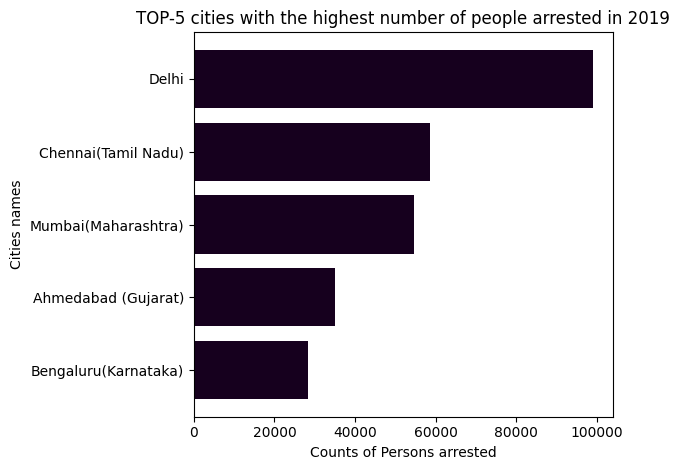

In [9]:
cities = (
    data[data["City"] != "TOTAL CITIES"]
    .nlargest(5, "total_all")[["City", "total_all"]]
    .reset_index(drop=True)
    .iloc[::-1]
)
plt.barh(cities["City"], cities["total_all"], color="#16001E")
plt.xlabel("Counts of Persons arrested")
plt.ylabel("Cities names")
plt.title("TOP-5 cities with the highest number of people arrested in 2019")
plt.tight_layout()
plt.show()

### Q2. For each city, calculate the ratio of male to female arrests (total_m / total_f).

Plot the top 10 cities with the highest male-to-female ratio as a bar chart.

Add a horizontal line at y=1 to show where male and female arrests are equal.

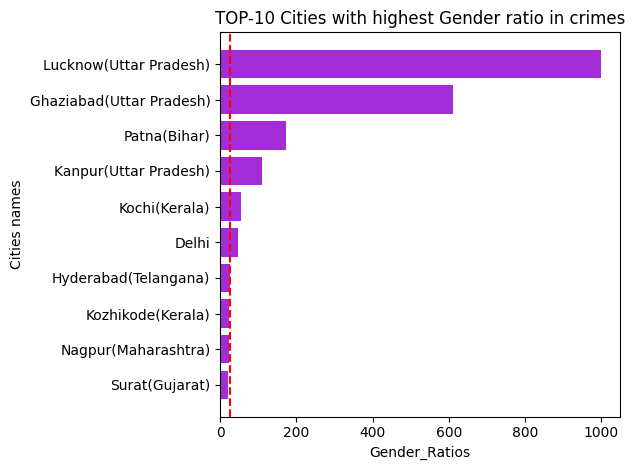

In [10]:
data['gender_ratio'] = data['total_m'] / data['total_f']
data['gender_ratio'] = data['gender_ratio'].replace([np.inf], 999)

cities = data[data["City"] != "TOTAL CITIES"].nlargest(10,'gender_ratio')[['City','gender_ratio']].reset_index(drop=True).iloc[::-1]

plt.barh(cities['City'],cities['gender_ratio'],color="#A42CD6")
plt.title('TOP-10 Cities with highest Gender ratio in crimes')
plt.xlabel('Gender_Ratios')
plt.ylabel('Cities names')
plt.axvline(25, color="red", linestyle="--", label="Equal ratio (1)")
plt.tight_layout()
plt.show()


### Q3. For each age group (juv_total, age18_30_t, age30_45_t, age45_60_t, age60_t):

Find the total number of arrests across all cities.

Plot them in a pie chart (or a donut chart) to show which age group contributes the most to arrests in 2019.

#### This will reveal whether crimes are dominated by juveniles, young adults, middle-aged, or older people.

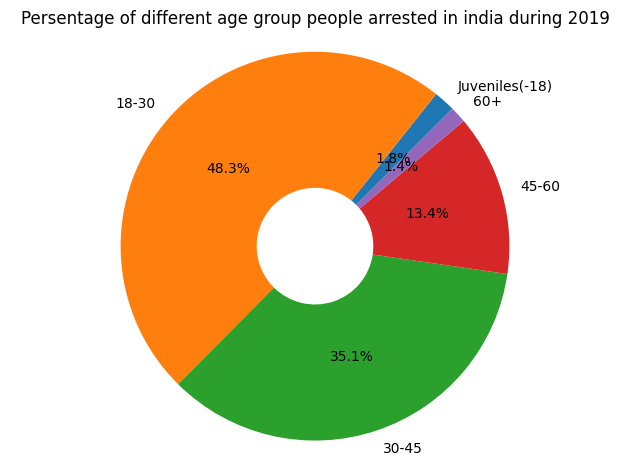

In [65]:
aai = data.loc[data["City"] == "TOTAL CITIES"][
    ["juv_total", "age18_30_t", "age30_45_t", "age45_60_t", "age60_t"]
]

labels = ["Juveniles(-18)", "18-30", "30-45", "45-60", "60+"]
plt.pie(aai.values[0], labels=labels, autopct="%1.1f%%", startangle=45,wedgeprops=dict(width=0.7))
plt.title("Persentage of different age group people arrested in india during 2019")
plt.axis("equal")
plt.tight_layout()
plt.show()

### Q4. For the top 7 cities with the highest juvenile arrests (juv_total),

Plot a stacked bar chart with juv_boys and juv_girls.

Use different colors (e.g., blue for boys, pink for girls).

This will show both the scale and gender difference in juvenile arrests city-wise.

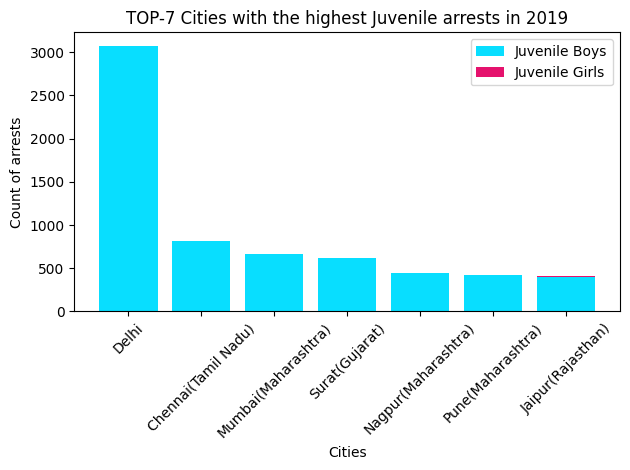

In [64]:
cities = data[data['City']!='TOTAL CITIES'].nlargest(7,'juv_total').reset_index(drop=True)

plt.bar(cities['City'],cities['juv_boys'],color="#08DEFF",label='Juvenile Boys')
plt.bar(cities['City'],cities['juv_girls'],color="#E5126D",bottom=cities['juv_boys'],label='Juvenile Girls')

plt.title("TOP-7 Cities with the highest Juvenile arrests in 2019")
plt.xlabel('Cities')
plt.ylabel('Count of arrests')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Pick the top 5 cities by total arrests (total_all),
and for each city, plot a grouped bar chart showing all five age groups (juv_total, age18_30_t, age30_45_t, age45_60_t, age60_t).

👉 This will compare how age distribution differs between high-crime cities.

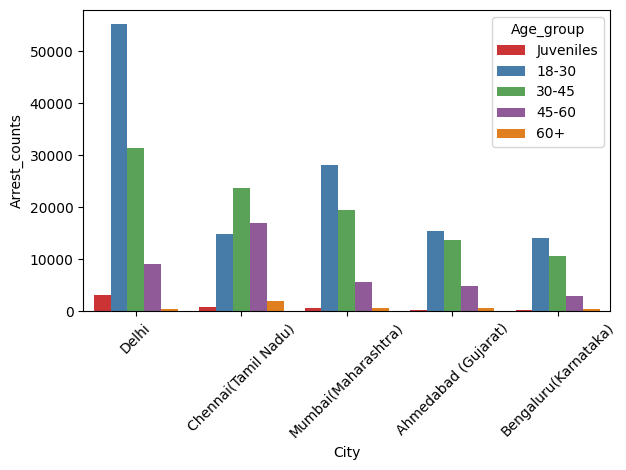

In [25]:
cities = (
    data[data["City"] != "TOTAL CITIES"].nlargest(5, "total_all").reset_index(drop=True)
)
cities_subset = cities[
    ["City", "juv_total", "age18_30_t", "age30_45_t", "age45_60_t", "age60_t"]
]

cities_melted = cities_subset.melt(
    id_vars=["City"],
    value_vars=["juv_total", "age18_30_t", "age30_45_t", "age45_60_t", "age60_t"],
    var_name="Age_group",
    value_name="Arrest_counts",
)
# Create better labels for age groups
age_group_labels = {
    "juv_total": "Juveniles",
    "age18_30_t": "18-30",
    "age30_45_t": "30-45",
    "age45_60_t": "45-60",
    "age60_t": "60+",
}
cities_melted["Age_group"] = cities_melted["Age_group"].map(age_group_labels)

sns.barplot(
    data=cities_melted, x="City", y="Arrest_counts", hue="Age_group", palette="Set1"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Find the top 10 cities (excluding TOTAL CITIES) with the highest female arrests (total_f), and create a horizontal bar chart to visualize them.

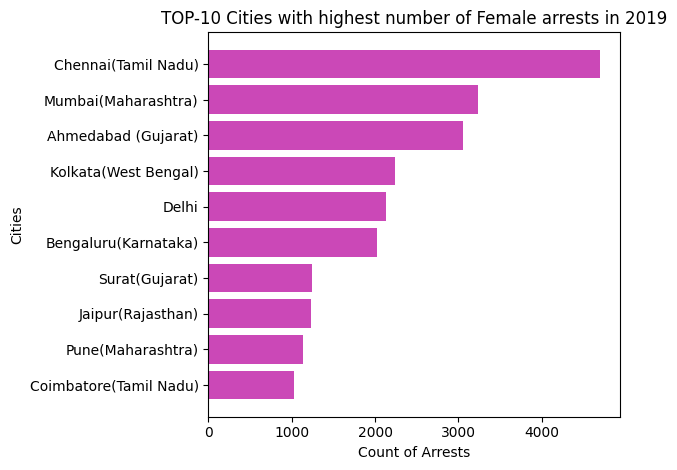

In [29]:
cities = data[data['City']!="TOTAL CITIES"].nlargest(10,'total_f').reset_index(drop=True).iloc[::-1]

plt.barh(cities['City'],cities['total_f'], color='#CB48B7')
plt.title('TOP-10 Cities with highest number of Female arrests in 2019')
plt.xlabel('Count of Arrests')
plt.ylabel('Cities')
plt.tight_layout()
plt.show()


#### Calculate the overall gender distribution of arrests across India in 2019.

Compute the sum of male (total_m) and female (total_f) arrests.

Create a pie chart showing the proportion of male vs. female arrests.

👉 This will give a clear big-picture view of how gender is distributed in arrests nationwide.

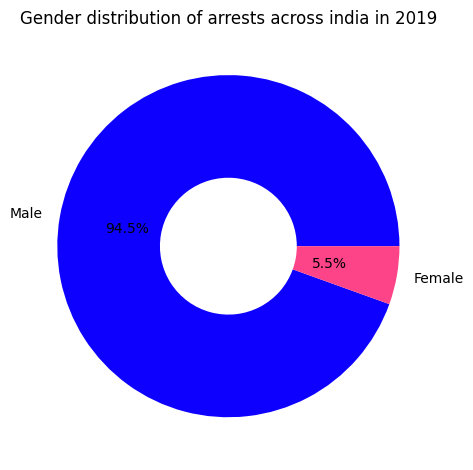

In [49]:
res = data.loc[data['City'] =='TOTAL CITIES'][['total_m','total_f']]

labels = ['Male','Female']
plt.pie(res.values[0],labels=labels, autopct="%1.1f%%",colors=["#0D00FF","#FE4488"],wedgeprops=dict(width=0.6))
plt.title('Gender distribution of arrests across india in 2019')

plt.tight_layout()
plt.show()

#### Find the Top 5 Cities (excluding TOTAL CITIES) where senior citizens (age60_t) have the highest number of arrests in 2019.

👉 This will highlight which cities see the most crime involvement from the 60+ age group.

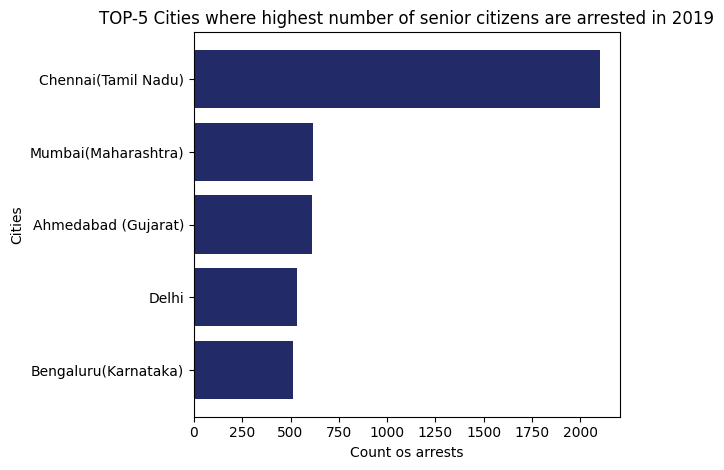

In [57]:
cities = data[data['City']!='TOTAL CITIES'].nlargest(5,'age60_t').reset_index(drop=True).iloc[::-1]

plt.barh(cities['City'],cities['age60_t'], color='#222A68')
plt.title('TOP-5 Cities where highest number of senior citizens are arrested in 2019')
plt.ylabel('Cities')
plt.xlabel('Count os arrests')
plt.tight_layout()
plt.show()

#### Among the Top 5 cities by total arrests (total_all), compare male vs. female arrests side by side using a grouped bar chart.
This will let you directly see gender disparities in arrests across the busiest cities.

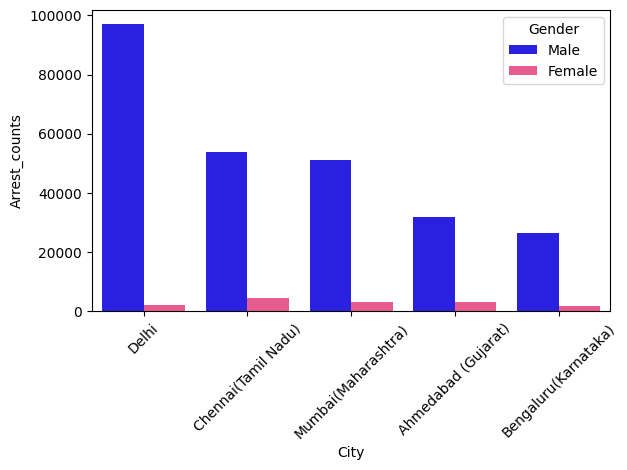

In [62]:
cities = data[data['City']!='TOTAL CITIES'].nlargest(5,'total_all').reset_index(drop=True)

cities_subset = cities[
    ["City", "total_m", "total_f"]
]

cities_melted = cities_subset.melt(
    id_vars=["City"],
    value_vars=["total_m", "total_f"],
    var_name="Gender",
    value_name="Arrest_counts",
)
# Create better labels for genders
gender_labels = {
    "total_m": "Male",
    "total_f": "Female",
}
cities_melted["Gender"] = cities_melted["Gender"].map(gender_labels)

sns.barplot(
    data=cities_melted, x="City", y="Arrest_counts", hue="Gender", palette=["#0D00FF","#FE4488"]
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📌 Conclusion

1. **Overall Arrests (2019):**  
   - Delhi recorded the **highest number of total arrests**, followed by Chennai and Ahmedabad.  
   - Female arrests were significantly lower than male arrests across all cities.  

2. **Gender Insights:**  
   - The **male-to-female arrest ratio** is extremely skewed, with men forming the majority in every city.  
   - Delhi also had the **highest number of female arrests** in absolute terms.  

3. **Juvenile Involvement:**  
   - Certain cities (like Delhi and Chennai) reported a **notably high number of juvenile arrests**, highlighting areas of youth-related crime.  
   - Boys dominate almost entirely in juvenile arrests, with girls contributing a negligible share.  

4. **Age Group Distribution:**  
   - The **18–30 age group** contributed the largest share of arrests across India.  
   - Senior citizen arrests (60+) were very low in comparison, but still noticeable in some metros.  

5. **National-Level Trends (TOTAL CITIES):**  
   - At the all-India level, men make up ~95%+ of arrests.  
   - The **age pyramid of arrests** is concentrated in the 18–45 range, confirming that crimes are most associated with younger adults.  

---

### 📝 Final Note  
This project successfully used **NumPy, Pandas, Matplotlib, and Seaborn** to explore the dataset from multiple perspectives: city-wise, gender-wise, and age-wise.  
The analysis reveals **clear demographic patterns** in arrests while demonstrating efficient use of Python data science libraries for insight generation.  
